In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data1990 = pd.read_csv('Resources/1990data_redo.csv')
data2000 = pd.read_csv('Resources/2000data_redo.csv')
data2010 = pd.read_csv('Resources/2010data.csv')
data2019 = pd.read_csv('Resources/2019data.csv')

In [3]:
data1990['year'] = 0
data2000['year'] = 1
data2010['year'] = 2
data2019['year'] = 3
data1990.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,year
0,0,0.7360,https://api.spotify.com/v1/audio-analysis/1NCu...,0.780,322133,0.565,1NCuYqMc8hKMb4cpNTcJbD,0.002690,3,0.0630,-7.320,0,0.0306,101.967,4,https://api.spotify.com/v1/tracks/1NCuYqMc8hKM...,audio_features,spotify:track:1NCuYqMc8hKMb4cpNTcJbD,0.365,0
1,1,0.0561,https://api.spotify.com/v1/audio-analysis/51q3...,0.631,330933,0.935,51q3nDYWAqPY4hlgKEbP6j,0.152000,1,0.6340,-8.340,0,0.0587,109.122,4,https://api.spotify.com/v1/tracks/51q3nDYWAqPY...,audio_features,spotify:track:51q3nDYWAqPY4hlgKEbP6j,0.678,0
2,2,0.6570,https://api.spotify.com/v1/audio-analysis/5z3Z...,0.401,211973,0.285,5z3ZDMP02xF33yCvPFnct3,0.000011,11,0.1580,-11.005,1,0.0327,130.465,4,https://api.spotify.com/v1/tracks/5z3ZDMP02xF3...,audio_features,spotify:track:5z3ZDMP02xF33yCvPFnct3,0.267,0
3,3,0.0287,https://api.spotify.com/v1/audio-analysis/0UAE...,0.862,215040,0.918,0UAEHlFR79k9CJvknSGUNf,0.000001,10,0.0492,-7.325,0,0.1080,124.811,4,https://api.spotify.com/v1/tracks/0UAEHlFR79k9...,audio_features,spotify:track:0UAEHlFR79k9CJvknSGUNf,0.651,0
4,4,0.3340,https://api.spotify.com/v1/audio-analysis/1s12...,0.713,274093,0.432,1s12gYsPeTNQ6znow46nmp,0.000299,11,0.0674,-12.639,0,0.0300,118.955,4,https://api.spotify.com/v1/tracks/1s12gYsPeTNQ...,audio_features,spotify:track:1s12gYsPeTNQ6znow46nmp,0.445,0


In [4]:
df = pd.concat([data1990, data2000,data2010,data2019], ignore_index=True,sort=False)

In [5]:
df = df[['year','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
df = df.dropna(how = 'any')
df.tail()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
4571,3,0.0794,0.816,136366.0,0.582,0.000006,8.0,0.0916,-4.141,1.0,0.341,160.004,4.0,0.542
4572,3,0.3630,0.630,174333.0,0.671,0.000000,6.0,0.1130,-6.659,0.0,0.256,89.921,4.0,0.333
4573,3,0.5820,0.819,268893.0,0.458,0.173000,4.0,0.1280,-10.223,0.0,0.167,122.981,4.0,0.232
4574,3,0.1190,0.400,186107.0,0.795,0.000000,10.0,0.1590,-3.731,0.0,0.461,190.097,4.0,0.702
4575,3,0.3900,0.853,221543.0,0.351,0.000009,7.0,0.7520,-10.198,1.0,0.241,118.028,4.0,0.282


In [6]:
X = df[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
y = df["year"].values#.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)


Shape:  (4576, 13) (4576,)


In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler 
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train) 
X_test_scaled = X_scaler.transform(X_test)

### Decision Tree Model

In [9]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier()

In [10]:
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)


0.8671328671328671

In [11]:
predictions = clf.predict(X_test_scaled)


In [12]:
test_result_df = pd.DataFrame({"Predicted": predictions, "Actual": predictions})[["Predicted", "Actual"]]
test_result_df.head()

,Predicted,Actual
0,1,1
1,1,1
2,1,1
3,3,3
4,0,0


In [13]:
feature_names = X.columns
sorted(zip(clf.feature_importances_, feature_names), reverse=True)


[(0.13926490272192343, 'duration_ms'),
 (0.1224338581385533, 'loudness'),
 (0.09915947012699673, 'energy'),
 (0.0979233911697202, 'danceability'),
 (0.09268691157612152, 'valence'),
 (0.09229130771025226, 'tempo'),
 (0.08805827779518113, 'acousticness'),
 (0.0828984402187735, 'liveness'),
 (0.06962285661032946, 'speechiness'),
 (0.050882069997211093, 'instrumentalness'),
 (0.04476540528589532, 'key'),
 (0.012448348198755534, 'mode'),
 (0.007564760450286444, 'time_signature')]

### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=200) 
rf = rf.fit(X_train_scaled, y_train) 
rf.score(X_test_scaled, y_test)
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)


[(0.13005504412874244, 'duration_ms'),
 (0.12651422121255737, 'loudness'),
 (0.09066596575369455, 'energy'),
 (0.09019465823490432, 'speechiness'),
 (0.08897978492551588, 'tempo'),
 (0.08772371898113583, 'valence'),
 (0.08745137127109334, 'danceability'),
 (0.08490032578998634, 'acousticness'),
 (0.08192569848237632, 'liveness'),
 (0.06349978622052377, 'instrumentalness'),
 (0.04925060952621654, 'key'),
 (0.013383697500299776, 'mode'),
 (0.005455117972953564, 'time_signature')]

In [15]:
rf.score(X_test_scaled, y_test)

0.8863636363636364

### Neural Network

In [16]:
from numpy.random import seed 
seed(42)

In [17]:
from keras.utils import to_categorical
y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)

Using TensorFlow backend.


In [65]:
from tensorflow.keras.models import Sequential 
model_neural = Sequential()


In [66]:
from tensorflow.keras.layers import Dense 
number_inputs = 13 
number_hidden_nodes = 100 
model_neural.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

for i in range(11):
    model_neural.add(Dense(units=number_hidden_nodes, activation='relu')) 

number_classes = 4 
model_neural.add(Dense(units=number_classes, activation='softmax'))
model_neural.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 100)               1400      
_________________________________________________________________
dense_194 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_195 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_196 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_197 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_198 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_199 (Dense)            (None, 100)              

In [67]:
model_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [68]:
model_neural.fit( X_train_scaled, y_train_cate, epochs=20, shuffle=True, verbose=2 )
model_loss, model_accuracy = model_neural.evaluate( X_test_scaled, y_test_cate, verbose=2) 
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Train on 3432 samples
Epoch 1/20
3432/3432 - 2s - loss: 1.2907 - accuracy: 0.3782
Epoch 2/20
3432/3432 - 1s - loss: 1.1775 - accuracy: 0.4682
Epoch 3/20
3432/3432 - 0s - loss: 1.1033 - accuracy: 0.5271
Epoch 4/20
3432/3432 - 0s - loss: 1.0593 - accuracy: 0.5600
Epoch 5/20
3432/3432 - 0s - loss: 0.9861 - accuracy: 0.6072
Epoch 6/20
3432/3432 - 0s - loss: 0.9264 - accuracy: 0.6428
Epoch 7/20
3432/3432 - 0s - loss: 0.8521 - accuracy: 0.6897
Epoch 8/20
3432/3432 - 0s - loss: 0.7689 - accuracy: 0.7232
Epoch 9/20
3432/3432 - 0s - loss: 0.6903 - accuracy: 0.7602
Epoch 10/20
3432/3432 - 0s - loss: 0.6514 - accuracy: 0.7686
Epoch 11/20
3432/3432 - 0s - loss: 0.5792 - accuracy: 0.8033
Epoch 12/20
3432/3432 - 0s - loss: 0.5216 - accuracy: 0.8156
Epoch 13/20
3432/3432 - 0s - loss: 0.4735 - accuracy: 0.8371
Epoch 14/20
3432/3432 - 0s - loss: 0.4262 - accuracy: 0.8564
Epoch 15/20
3432/3432 - 0s - loss: 0.3993 - accuracy: 0.8639
Epoch 16/20
3432/3432 - 0s - loss: 0.3691 - accuracy: 0.8700
Epoch 17/20

### K Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = [] 
test_scores = []
for k in range(1, 20, 2):
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train_scaled, y_train)  
      train_score = knn.score(X_train_scaled, y_train)
      test_score = knn.score(X_test_scaled, y_test) 
      train_scores.append(train_score) 
      test_scores.append(test_score)
      print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 1, Train/Test Score: 0.962/0.872
k: 3, Train/Test Score: 0.896/0.757
k: 5, Train/Test Score: 0.818/0.675
k: 7, Train/Test Score: 0.739/0.608
k: 9, Train/Test Score: 0.687/0.574
k: 11, Train/Test Score: 0.649/0.556
k: 13, Train/Test Score: 0.623/0.552
k: 15, Train/Test Score: 0.620/0.542
k: 17, Train/Test Score: 0.605/0.526
k: 19, Train/Test Score: 0.585/0.530


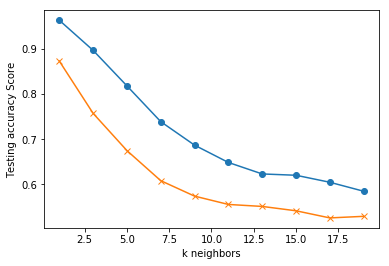

In [23]:
plt.plot(range(1, 20, 2), train_scores, marker='o') 
plt.plot(range(1, 20, 2), test_scores, marker="x") 
plt.xlabel("k neighbors") 
plt.ylabel("Testing accuracy Score")
plt.show()


In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train) 
print('k=1 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))


k=1 Test Acc: 0.872
